In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from matplotlib.gridspec import GridSpec

# ---
thisrun = "no_app_site_311_1851-1950mean_x100yr_gbas_field_tau80p0"
outdir = "/home/tykukla/SCEPTER/scepter_output"

In [2]:
# --- FUNCTION to preprocess .txt files for consistent delimiters
def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r'\s+', line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r'\s+', line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [3]:
# --- read in profile data
# profile data have one file per timestep, so we must read each in separately and combine

# where results are stored
results_path = os.path.join(outdir, thisrun)
flx_path, prof_path = os.path.join(results_path, "flx"), os.path.join(results_path, "prof")

# define file name pattern
fn_pref = ["prof_aq", "prof_sld(wt%)"]
fn_ext = ".txt"

# loop through variables
df = pd.DataFrame()  # initialize empty df to store dat
for var in fn_pref:
    # set pattern
    fn_pattern = f"{var}-*{fn_ext}"
    # get list of filenames
    file_paths = glob.glob(f"{prof_path}/{fn_pattern}")
    file_paths_numsOnly = [path for path in file_paths if re.search(r'\d', path.split("/")[-1])]
    # filter edge case of "prof_aq-DIC-020.txt"
    if 'prof_aq-DIC-020.txt' in file_paths_numsOnly:
        file_paths_numsOnly=file_paths_numsOnly.remove('prof-restart')
    # read in data and concatenate
    for file_path in file_paths_numsOnly:
        dfi = preprocess_txt(file_path)
        # apply pd.to_numeric to all columns using the "map" method
        dfi = dfi.map(pd.to_numeric)
        # add var
        dfi["var"] = var
        # combine
        df = pd.concat([df, dfi], ignore_index=True)


# sort by time and depth
df = df.sort_values(by=["var", "time", "z"])
df

,z,ca,k,mg,na,no3,ph,time,var,8.333333333333333218e-03,...,g2,amnt,cc,ka,gb,ct,cabd,ill,gps,mgbd
90,0.008333,0.000015,2.742695e-21,7.426585e-22,4.205871e-18,0.000018,6.055867,0.000668,prof_aq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,0.025000,0.000040,4.469849e-21,1.977048e-21,5.304150e-21,0.000032,5.843212,0.000668,prof_aq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.041667,0.000059,5.430905e-21,2.917461e-21,5.440688e-21,0.000045,5.758754,0.000668,prof_aq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,0.058333,0.000076,6.149807e-21,3.740587e-21,6.164191e-21,0.000058,5.704803,0.000668,prof_aq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.075000,0.000091,6.736607e-21,4.488273e-21,6.754335e-21,0.000072,5.665243,0.000668,prof_aq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0.425000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,prof_sld(wt%),NaN,...,7.093816e-21,5.579770e-23,6.977169e-23,9.981134e-19,9.783276e-19,9.722043e-19,9.902646e-19,9.895503e-19,1.200177e-22,9.903422e-19
1135,0.441667,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,prof_sld(wt%),NaN,...,1.908552e-20,5.579770e-23,6.977169e-23,9.984732e-19,9.818277e-19,9.765261e-19,9.920855e-19,9.915042e-19,1.200177e-22,9.921486e-19
1136,0.458333,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,prof_sld(wt%),NaN,...,5.134852e-20,5.579770e-23,6.977169e-23,9.988440e-19,9.858499e-19,9.816230e-19,9.939866e-19,9.935446e-19,1.200177e-22,9.940346e-19
1137,0.475000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,prof_sld(wt%),NaN,...,1.381503e-19,7.567115e-23,6.977169e-23,9.992240e-19,9.903128e-19,9.873737e-19,9.959537e-19,9.956560e-19,1.200177e-22,9.959861e-19


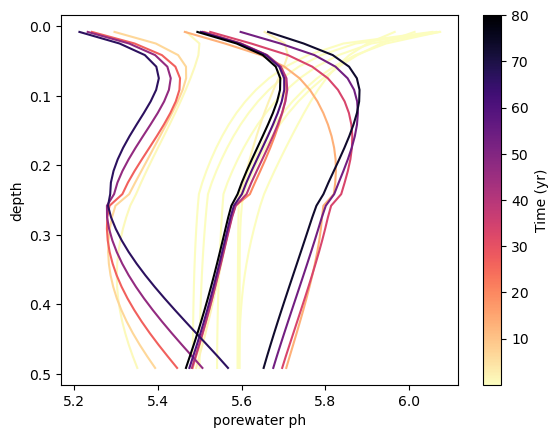

In [4]:
# --- plot depth profile of calcite through time
dfx = df[df['var'] == "prof_aq"]
# Group the DataFrame by the 'time' column
grouped = dfx.groupby('time')

# Create a colormap
cmap = plt.get_cmap('magma')  # Get the colormap
cmap = cmap.reversed()   # flip colormap
# -- no log normalization
norm = plt.Normalize(df['time'].min(), df['time'].max())  # Normalize time values for colormap
# -- log normalization WIP
# log_time = np.log(df['time'])
# norm = plt.Normalize(log_time.min(), log_time.max())  # Normalize time values for colormap

# Create a plot for each time step
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group['ph'], group['z'], color=color, label=None)
    # plt.plot(group['gt'], group['z'], color=color, linestyle='dashed', label=None)

# Add labels and a legend
plt.xlabel('porewater ph')
plt.ylabel('depth')

# Create a colorbar based on the Viridis colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array for the colorbar data
cbar = plt.colorbar(sm, label='Time (yr)', ax=plt.gca())

# flip y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [8]:
# --- CLIMATE CHECK
# --- function to preprocess clim .in files
def read_cust_delim_file(file_path):
    # Read the first line to get column names using '/'
    with open(file_path, 'r') as file:
        # columns = file.readline().strip().split(' / ')
        columns = file.readline().strip().split('\t')

    # Read the rest of the file using '\t' as the data delimiter
    df = pd.read_table(file_path, names=columns, delimiter='\t', skiprows=[0])

    # --- clean up column names
    # Remove "# " prefix from column headers
    df.columns = df.columns.str.replace("# ", "")
    # Replace parentheses with underscores 
    df.columns = map(lambda x: x.replace('(', '_').replace(')', ''), df.columns)
    # replace "/" with underscores
    df.columns = map(lambda x: x.replace('/', '_'), df.columns)
    # remove leading or trailing spaces
    df.columns = df.columns.str.strip()
    # return
    return df

In [9]:
# --- read in data
fnvars = ["T", "q", "Wet"]
fnsuff = "_temp.in"

# loop through vars
dfclim = pd.DataFrame()
for var in fnvars:
    thisvar = var + fnsuff
    dfi = read_cust_delim_file(os.path.join(results_path, thisvar))
    # bring together
    if var == fnvars[0]:
        dfclim = dfi.copy()
    else:
        dfclim = pd.merge(dfclim, dfi, on='time_yr', how='outer')

dfclim

,time_yr,T_C,runoff_mm_month,moisture_mm_m
0,0.000000,-3.586963,9.764735,329.463898
1,0.083403,-8.527851,9.319208,356.724029
2,0.166806,-8.603878,13.061295,361.953278
3,0.250209,-2.492180,40.860158,374.286316
4,0.333611,10.923576,38.113700,360.910858
...,...,...,...,...
1195,99.666389,29.174759,18.346883,246.556946
1196,99.749792,28.903122,18.282712,217.623520
1197,99.833194,22.661577,17.396893,227.426682
1198,99.916597,14.047559,16.040920,262.363190


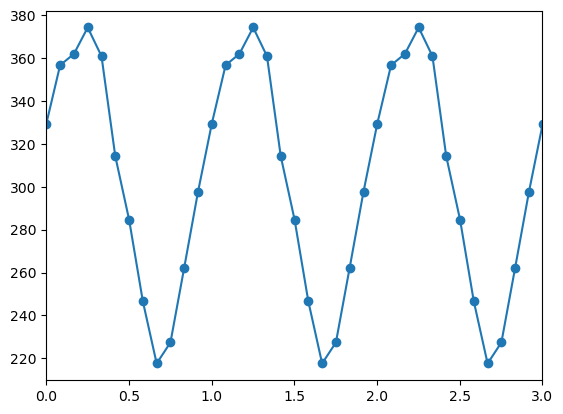

In [10]:
# --- quick plot, a few seasons
pvar = "moisture_mm_m"   # runoff_mm_month
               # T_C
               # moisture_mm_m

# plot 
plt.plot(dfclim['time_yr'], dfclim[pvar])
plt.scatter(dfclim['time_yr'], dfclim[pvar])
plt.xlim([0,3])
plt.show();

In [18]:
# --- flux data
results_path = outdir
results_dir = {"test": thisrun}
# define file name pattern
# fn_pref = ["int_flx_co2sp", "flx_co2sp" "int_flx_gas", "flx_gas"]   # will read in all species unless fn_varInclude is defined
fn_pref = ["flx_aq-ca"] # ["flx_gas-pco2"]   # will read in all species unless fn_varInclude is defined
fn_varInclude = []
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"

# loop through runs
df = pd.DataFrame()  # initialize empty df to store dat
for key, run in results_dir.items():
    # get these paths
    flx_path, prof_path = os.path.join(results_path, run, "flx"), os.path.join(results_path, run, "prof")

    # loop through variables
    for fset in fn_pref:
        # set pattern
        fn_pattern = f"{fset}*{fn_ext}"
        # get list of filenames
        file_paths = glob.glob(f"{flx_path}/{fn_pattern}")

        # read in data and concatenate
        for file_path in file_paths:
            # get the variable 
            varpattern = re.escape(fset) + r'(.*?).txt'
            varmatch = re.search(varpattern, file_path)
            var = varmatch.group(1)
            # skip this step if it's not in the include arr
            if varCheck:
                if var not in fn_varInclude:
                    continue
            # read in
            dfi = preprocess_txt(file_path)
            # apply pd.to_numeric to all columns using the "map" method
            dfi = dfi.map(pd.to_numeric)
            # add set, var, and key
            dfi["set"] = fset
            dfi["var"] = var
            dfi["run_id"] = key
            # combine
            df = pd.concat([df, dfi], ignore_index=True)

# sort by time and depth
df = df.sort_values(by=["var", "time"])
df

,time,tflx,adv,dif,rain,gbas,inrt,g2,amnt,cc,...,gb,ct,cabd,ill,gps,mgbd,res,set,var,run_id
0,1.000000e-19,-3448.247917,0.003441,6.994867e-16,0.0,-4.857715e-21,0.0,0.0,0.0,-3.022085e-18,...,0.0,0.0,-1.738338e-22,0.0,-2.964790e-15,0.0,-3.448244e+03,flx_aq-ca,,test
1,6.676667e-04,-0.003027,0.003027,8.197915e-16,0.0,-4.551372e-21,0.0,0.0,0.0,-2.095033e-18,...,0.0,0.0,-1.723796e-22,0.0,-2.551179e-17,0.0,9.051165e-11,flx_aq-ca,,test
2,2.001000e-03,-0.001313,0.001313,7.549791e-16,0.0,-4.551257e-21,0.0,0.0,0.0,-1.486215e-18,...,0.0,0.0,-1.704511e-22,0.0,-2.224762e-17,0.0,7.335580e-10,flx_aq-ca,,test
3,6.667667e-03,0.002614,-0.002614,6.716950e-16,0.0,-4.543401e-21,0.0,0.0,0.0,-7.650769e-19,...,0.0,0.0,-1.669133e-22,0.0,-1.255287e-18,0.0,2.520266e-11,flx_aq-ca,,test
4,2.000100e-02,0.006136,-0.006136,5.958504e-16,0.0,-4.215731e-21,0.0,0.0,0.0,-8.101577e-19,...,0.0,0.0,-1.572544e-22,0.0,-2.090255e-17,0.0,-2.525189e-13,flx_aq-ca,,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,7.974224e+01,-0.042235,0.042235,3.548119e-16,0.0,-5.699357e-20,0.0,0.0,0.0,-6.480506e-19,...,0.0,0.0,-7.514533e-22,0.0,-2.037447e-17,0.0,1.401527e-12,flx_aq-ca,,test
1016,7.982565e+01,-0.060755,0.060755,2.486770e-16,0.0,-3.579019e-20,0.0,0.0,0.0,-6.288319e-19,...,0.0,0.0,-5.678179e-22,0.0,-5.469364e-17,0.0,2.629195e-12,flx_aq-ca,,test
1017,7.990905e+01,-0.031852,0.031852,4.800678e-16,0.0,-1.816154e-20,0.0,0.0,0.0,-5.990600e-19,...,0.0,0.0,-3.836301e-22,0.0,-5.469364e-17,0.0,-3.683496e-13,flx_aq-ca,,test
1018,7.999245e+01,-0.013764,0.013764,-4.827851e-16,0.0,-8.326351e-21,0.0,0.0,0.0,-5.632980e-19,...,0.0,0.0,-2.489172e-22,0.0,-5.469364e-17,0.0,5.984701e-13,flx_aq-ca,,test


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


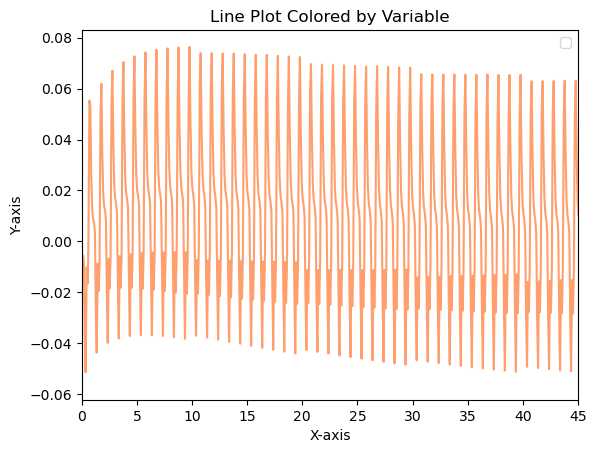

In [19]:
# --- plot CDR per year (lines colored by the set)
cdvar = "adv"    # variable to plot

# aesthetics
logX = False
logY = False
mycmap = "magma"   # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# ax limits
xmin, xmax = 0,45

# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()   # flip colormap
# -- no log normalization
norm = plt.Normalize(df['time'].min(), df['time'].max())  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
plt.plot(df['time'], df[cdvar], color=cmap(0.2), linestyle="-")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
if logX:
    plt.xscale('log')
    plt.xlim([0.1, 100])
if logY:
    plt.yscale('log')
    plt.ylim([0.0001, 15])
plt.title('Line Plot Colored by Variable')
plt.xlim([xmin, xmax])
# Add legend
plt.legend()
plt.show();